<h1>PROJECT CITYBIKE LUBLIN 

<span style="color:blue">Import all nessesary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

<h1>CITYBIKE 2014

<h3> 1.READ DATA

<span style="color:blue">Let's read data from 2014.xlsx file.

In [2]:
city_bike14 = pd.read_excel('2014.xlsx',sheet_name= ['Październik część 1','Październik część 2','Listopad'])

In [3]:
#You have to merge dataframes by using 'concat'

city_bike14 = pd.concat(objs=[city_bike14['Październik część 1'],city_bike14['Październik część 2'],city_bike14['Listopad']], ignore_index=True)
city_bike14.sample(3)


,Data i godzina wypożyczenia,Data i godzina zwrotu,Miejsce wypożyczenia,Miejsce zwrotu
75261,2014-10-30 00:34:00,2014-10-30 00:41:00,ul. Zana / ZUS,ul. Filaretów – pętla autobusowa / ul. Wyżynna
107637,2014-11-24 14:47:00,2014-11-24 15:15:00,ul. Piłsudskiego /MPWiK,ul. Żywnego / ul. Paryska
64172,2014-10-22 07:19:00,2014-10-22 07:32:00,al. Kraśnicka / Konstantynów,Al. Racławickie / Rondo Krwiodawców


In [4]:
city_bike14.rename(columns = {'Data i godzina wypożyczenia':'start_time', 'Data i godzina zwrotu':'end_time','Miejsce wypożyczenia':'start_place_id','Miejsce zwrotu':'end_place_id'},inplace=True)
city_bike14.head()

,start_time,end_time,start_place_id,end_place_id
0,2014-09-30 23:37:00,2014-10-01 00:00:00,ul. Ametystowa 15/sklep Stokrotka,ul. Nadbystrzycka / Politechnika Lubelska
1,2014-09-30 23:49:00,2014-10-01 00:00:00,Al. Racławickie / Rondo Krwiodawców,ul. Zana / Akademiki UMCS
2,2014-09-30 23:49:00,2014-10-01 00:01:00,ul. Żywnego / ul. Paryska,ul. Związkowa / WSPA
3,2014-09-30 23:59:00,2014-10-01 00:01:00,ul. Paderewskiego / ul. Leszetyckiego,ul. Paderewskiego / ul. Leszetyckiego
4,2014-09-30 23:46:00,2014-10-01 00:03:00,ul. Krakowskie Przedmieście/ul. Krótka,ul. Chodźki / ul. Hirszfelda


<span style="color:blue">What would you like to  know about data?
    
<span style="color:blue">Use DataFrame.info() and get information about:
    
<span style="color:blue">-numbers of rows and coulmns 
    
<span style="color:blue">-types of data
    
<span style="color:blue">-are there missing values? 
    
<span style="color:blue">-how many memory we need

In [5]:
city_bike14.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110931 entries, 0 to 110930
Data columns (total 4 columns):
start_time        110931 non-null datetime64[ns]
end_time          110931 non-null datetime64[ns]
start_place_id    110931 non-null object
end_place_id      110931 non-null object
dtypes: datetime64[ns](2), object(2)
memory usage: 25.9 MB


<span style="color:blue">There are 110931 rows and 4 columns.

<span style="color:blue">Dtypes: datetime64(2), obj(2)

<span style="color:blue">There are not missing value - every columns has the same num non-null values

<span style="color:blue">We use 25.9MB

In [6]:
#You can also use DataFrame.shape to get num of rows and columns and DataFrame.isnull to get num of non-null values
print(city_bike14.shape )
print(city_bike14.isnull().any().any()) #False means that you don't have any non-missing values

(110931, 4)
False


In [7]:
#Create additional TIME columns so it would be easier to manipulate the data

city_bike14['start_day'] = pd.DatetimeIndex(city_bike14['start_time']).dayofyear

city_bike14['start_month'] = pd.DatetimeIndex(city_bike14['start_time']).month

city_bike14['day_of_month'] = pd.DatetimeIndex(city_bike14['start_time']).day

city_bike14['day_of_week'] = pd.DatetimeIndex(city_bike14['start_time']).dayofweek



#Create additional duration column so it would be easier to manipulate the data

city_bike14['duration'] = city_bike14['end_time']-city_bike14['start_time']

city_bike14['duration_sec']= pd.TimedeltaIndex(city_bike14['end_time']-city_bike14['start_time']).seconds

city_bike14['duration_min'] = city_bike14['duration_sec'] / 60

city_bike14['duration_hour'] = city_bike14['duration_sec']/3600

city_bike14.sample(5)

,start_time,end_time,start_place_id,end_place_id,start_day,start_month,day_of_month,day_of_week,duration,duration_sec,duration_min,duration_hour
67777,2014-10-24 20:29:00,2014-10-24 20:44:00,Rondo Gen. Leona Berbeckiego /Lidl,Al. Smorawińskiego / Al. Kompozytorów Polskich,297,10,24,4,00:15:00,900,15.0,0.250000
85686,2014-11-05 17:32:00,2014-11-05 17:43:00,ul. Nadbystrzycka / Politechnika Lubelska,Al. Tysiąclecia / Plac Zamkowy,309,11,5,2,00:11:00,660,11.0,0.183333
40546,2014-10-13 17:04:00,2014-10-13 17:36:00,al. Zygmuntowskie / MOSiR,ul. Romera,286,10,13,0,00:32:00,1920,32.0,0.533333
31156,2014-10-10 19:33:00,2014-10-10 19:50:00,ul. Ametystowa 15/sklep Stokrotka,ul. Czwartaków / DS Helios UMCS,283,10,10,4,00:17:00,1020,17.0,0.283333
45440,2014-10-14 23:39:00,2014-10-14 23:57:00,ul. Paderewskiego / ul. Leszetyckiego,ul. Związkowa / WSPA,287,10,14,1,00:18:00,1080,18.0,0.300000


<h3>2.DATA ANALYSIS

In [8]:
#For how many days were the bikes available for rental?

num_of_days = city_bike14['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} days')

The bikes were available for rental for 62 dyas


In [9]:
#How many rentals were there?

num_of_rent = city_bike14['start_time'].count()

#or

num_of_rent = city_bike14.shape[0]

print(f'Count of rentals:{num_of_rent}')

Count of rentals:110931


In [10]:
#The average time of a rental:

avg_time = city_bike14['duration_min'].mean()

print(f'The average time of rental: {avg_time}')

The average time of rental: 17.862202630463983


In [11]:
#Rentals under 15 minutes

rentals_under_15 = len(city_bike14[city_bike14['duration_min']<15])

print('Num of rentals under 15 minutes:', rentals_under_15)

Num of rentals under 15 minutes: 70732


In [12]:
#Number of rentals per month, most popular month

month = {9:'September',10:'October',11:'November'}

top_month = city_bike14.groupby('start_month').agg({'start_time':'count'}).sort_values(by='start_time', ascending=False).iloc[0].name

print(f'The most popular month is: {month[top_month]}')

city_bike14.groupby('start_month').agg({'start_time':'count'}).sort_values(by=['start_time'], ascending=False)

The most popular month is: October


,start_time
start_month,
10,78153
11,32765
9,13


In [13]:
#Daily top score

city_bike14['date'] = pd.DatetimeIndex(city_bike14['start_time']).date

top_day = city_bike14.groupby('date').agg({'start_time':'count'}).sort_values(by='start_time', ascending=False).iloc[0].name

print(f'The most popular day: {top_day}')


city_bike14.groupby(['start_day']).agg({'start_time':'count'}).sort_values(by=['start_time'],ascending=False).head(1)


The most popular day: 2014-10-09


,start_time
start_day,
282,3788


In [58]:
#How many station were in Lublin in 2014?

num_of_stations = city_bike14['start_place_id'].nunique()

print(f'In Lublin were {num_of_stations} stations')

In Lublin were 41 stations


In [14]:
#Most popular start station

top_s_station = city_bike14['start_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station: {top_s_station}')

The most popular start station: ul. Krakowskie Przedmieście/ul. Krótka


In [15]:
#Most popular end station

top_end_station = city_bike14['end_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station: {top_end_station}')

The most popular start station: ul. Krakowskie Przedmieście/ul. Krótka


In [16]:
#How many bikes depart from each station monthly? 

city_bike14.groupby(['start_place_id','start_month'])[['start_time']].count()

start_time
start_place_id                                 start_month            
Al. Racławickie / Rondo Krwiodawców            9                     2
                                               10                 3688
                                               11                 1511
Al. Smorawińskiego / Al. Kompozytorów Polskich 9                     1
                                               10                 2982
...                                                                ...
ul. Związkowa / WSPA                           10                 1408
                                               11                  581
ul. Żywnego / ul. Paryska                      9                     2
                                               10                 1079
                                               11                  465

[90 rows x 1 columns]

In [17]:
#How many bikes return from each station monthly? 

city_bike14.groupby(['end_place_id','start_month'])[['end_time']].count().head()

end_time
end_place_id                                   start_month          
Al. Racławickie / Rondo Krwiodawców            10               3652
                                               11               1420
Al. Smorawińskiego / Al. Kompozytorów Polskich 10               2852
                                               11                962
Al. Tysiąclecia / Plac Zamkowy                 10               3431

In [18]:
#Find the longest ride

longest_ride = city_bike14.sort_values(by = ['duration'],ascending=False)

longest_ride.head(10)

longest_ride['duration'].loc[41244]

Timedelta('2 days 04:04:00')

<h3>3.PLOTS

In [19]:
#Create a plot for average rent number per month

average_rent = city_bike14.groupby('start_month').agg({'start_time':'count'}) #I count num of rent per month

average_rent['num_day_in_month'] = city_bike14.groupby(['start_month'])[['day_of_month']].nunique() #I count num of days in month

average_rent['result'] = average_rent['start_time']//average_rent['num_day_in_month'] #I count average rent number for every month

average_rent

,start_time,num_day_in_month,result
start_month,,,
9,13,1,13
10,78153,31,2521
11,32765,30,1092


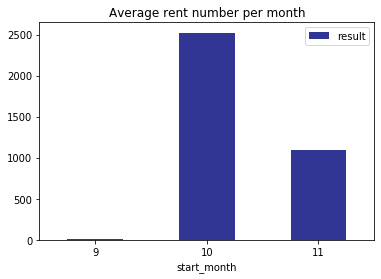

In [31]:
#Use matplotlib
average_rent['result'].plot(kind = 'bar', rot=360, title = 'Average rent number per month', legend = True, colormap = 'RdYlBu_r');

In [33]:
#This is the same plot but by using plotly

fig = go.FigureWidget(data=go.Bar(y=average_rent['result'], x = ['August','September','October']))
fig.update_layout(
    title={
        'text': 'Average rent number per month',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='dodgerblue')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None

    )

fig.show()

In [22]:
#Create a plot for average rent number per day of week

city_bike14['day_of_week'] = pd.DatetimeIndex(city_bike14['start_time']).dayofweek #I add a column with day of week 

rent_num_per_day = city_bike14.groupby('day_of_week').agg({'start_time':['count']}) #I count num of rentals per day of week

rent_num_per_day

,start_time
,count
day_of_week,
0,15896
1,16042
2,18961
3,18188
4,16341
5,12423
6,13080


In [23]:
num_of_day_df = pd.DataFrame(city_bike14.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()

rent_num_per_day['num_of_days']=num_of_day_df['day_of_week']

rent_num_per_day['num_per_day'] = rent_num_per_day['start_time']['count'] / rent_num_per_day['num_of_days']

rent_num_per_day.round(2)

,start_time,num_of_days,num_per_day
,count,,
day_of_week,,,
0,15896,8,1987.00
1,16042,9,1782.44
2,18961,9,2106.78
3,18188,9,2020.89
4,16341,9,1815.67
5,12423,9,1380.33
6,13080,9,1453.33


In [34]:
fig = px.bar(rent_num_per_day, x=rent_num_per_day.index, y='num_per_day')
fig.update_layout(
    title={
        'text': "Number of rentals per day of week.",
         'font': {
              'family': 'Calibri',
              'size': 30
        },
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='skyblue')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None
    )
fig.show()

In [25]:
#Create a plot for average time of rent per day of week

average_time_of_rent_per_day = city_bike14.groupby('day_of_week').agg({'duration_min':'mean'})
average_time_of_rent_per_day.reset_index(inplace=True)
average_time_of_rent_per_day

,day_of_week,duration_min
0,0,16.143369
1,1,17.048061
2,2,14.712146
3,3,15.802947
4,4,16.533015
5,5,22.840779
6,6,25.311468


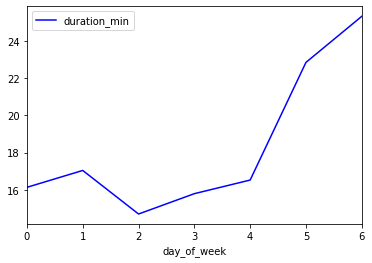

In [35]:
average_time_of_rent_per_day.plot(x = 'day_of_week', y = 'duration_min', kind ='line',color='b');

In [43]:
fig = go.Figure()
fig. add_trace(go.Bar(x=average_time_of_rent_per_day['day_of_week'], y=average_time_of_rent_per_day['duration_min']))
fig.update_layout(
    title={
        'text': 'Average time of rent per day of week',
         'font': {
              'family': 'Calibri',
              'size': 30
        },'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker_color='royalblue')
fig.update_yaxes(
    title_text = 'number of rentals',
    )
fig.update_xaxes(
    title_text = None)

fig.show()

In [28]:
#Create a plot for average number of rents per hour (so we can check for example
#how many rents on average are there during rush hours )
city_bike14['start_hour'] = pd.DatetimeIndex(city_bike14['start_time']).hour
ave_rent_per_h = city_bike14.groupby(['start_hour']).agg({'start_time':'count'})
ave_rent_per_h

,start_time
start_hour,
0,1649
1,1209
2,720
3,516
4,309
5,459
6,1413
7,4319
8,3504


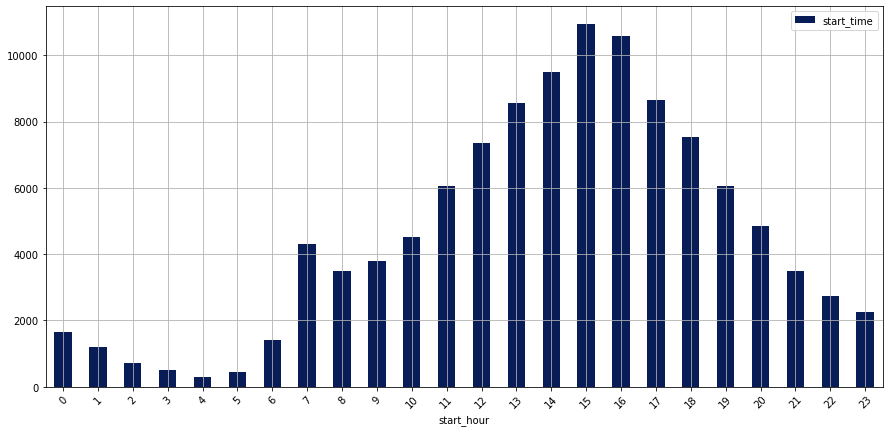

In [55]:
ave_rent_per_h.plot(kind ='bar', figsize = (15,7), use_index=True, xticks = (range(24)),rot = 45, grid=True, colormap = 'YlGnBu_r');
                   

<h3>4.Conclusions

<span style="color:blue">1. The bikes were available by 62 days
    
<span style="color:blue">2. The number of rent: 110931

<span style="color:blue">3. There were 41 stations
    
<span style="color:blue">4. The average time of rent: 17.86
    
<span style="color:blue">5. Count of rentals under 15 minutes: 70732 which is more than half all rentals
    
<span style="color:blue">6. The most popular month was October, and the most popular day was 2014-10-09, it was Thuersday
    
<span style="color:blue">7. The most popular start and end station is ul. Krakowskie Przedmieście/ul. Krótka
    
<span style="color:blue">8. The longest ride lasted 2 days 04:04:00
    
<span style="color:blue">9. The average rent number per day of week was the highest on Wednesday
    
<span style="color:blue">10. The average time of rent per day of week was the highest in Saturday (22.84) and Sunday (25.31)
    
<span style="color:blue">11. The most popular hours for rent was beetwen  3 pm and 4 pm